In [ ]:
#Netflix stock price prediction with LSTM
#This is a combination of algorithms allowing us to complex operations on data

In [79]:
#Import required libraries/modules
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [80]:
df = web.DataReader('NFLX', data_source = 'yahoo', start = '2002-05-23',end = '2022-06-28')
df.shape #Get the number of columns and rows respectively in our new DataFrame

(5060, 6)

In [81]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-22,182.820007,170.199997,170.750000,178.889999,11992400.0,178.889999
2022-06-23,182.759995,175.869995,180.500000,181.710007,9538200.0,181.710007
2022-06-24,191.190002,181.839996,183.500000,190.850006,12407800.0,190.850006
2022-06-27,191.779999,182.389999,191.770004,189.139999,8357300.0,189.139999
2022-06-28,192.199997,181.009995,189.199997,181.195007,4591933.0,181.195007


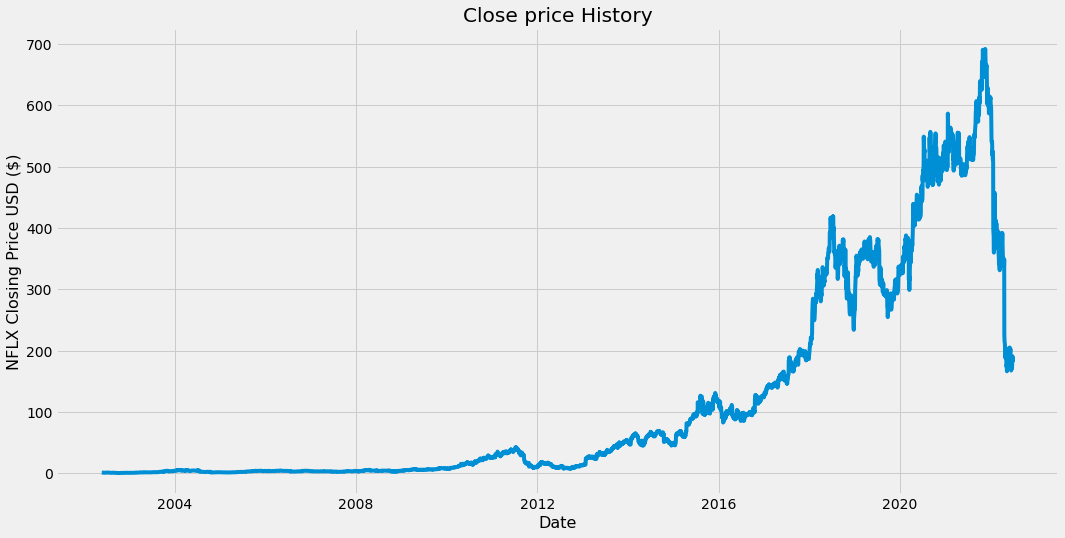

In [82]:
plt.figure(figsize = (16,8))
plt.title("Close price History")
plt.plot(df['Close'])
plt.xlabel('Date' , fontsize = 16)
plt.ylabel('NFLX Closing Price USD ($)', fontsize = 16)
plt.show()

In [56]:
#Create a new DataFrame with only the closing column
data = df.filter(['Close'])

#Conver the DataFrame to a numpy array
dataset = data.values

#Find the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

4048

Preprocessing

In [57]:
#Scale the data
scaler = MinMaxScaler (feature_range=(0,1)) #Scale features to be within a certain standardized range
scaled_data = scaler.fit_transform(dataset)

scaled_data 

array([[0.00119131],
       [0.00121094],
       [0.00113448],
       ...,
       [0.27552788],
       [0.27305433],
       [0.26222717]])

In [58]:
#Create training data set
#Create scaledf training data set
train_data = scaled_data[0:training_data_len, :]

In [59]:
#Split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    # x_train values wil be indexed from position 0 to position 59
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i, 0 ])
    
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00119131, 0.00121094, 0.00113448, 0.00105699, 0.00101049,
       0.00101773, 0.00109315, 0.00107765, 0.00112002, 0.00117064,
       0.00107869, 0.00113345, 0.00112931, 0.00104149, 0.00102703,
       0.00088754, 0.00079455, 0.00077802, 0.00083691, 0.00084518,
       0.00087721, 0.00087617, 0.00085551, 0.00089064, 0.00082555,
       0.00090614, 0.00094747, 0.00115721, 0.00121714, 0.00130703,
       0.00116134, 0.00113965, 0.00114378, 0.0012967 , 0.00120784,
       0.00111382, 0.00109005, 0.00103632, 0.00112312, 0.00113861,
       0.00115411, 0.00111898, 0.00107249, 0.00095987, 0.00072119,
       0.00072842, 0.00078318, 0.00084001, 0.00075012, 0.00058584,
       0.00058171, 0.00056104, 0.00060857, 0.0006127 , 0.00059927,
       0.00055588, 0.00057861, 0.00066643, 0.00073772, 0.00078112])]
[0.0008813407630413681]



In [60]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [61]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3988, 60, 1)

In [62]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences  = False))
model.add(Dense(25))
model.add(Dense(1))

In [63]:
#Compile model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [64]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

3988/3988 [==============================] - 49s 12ms/step - loss: 2.7387e-04


In [65]:
#Create the testing data set 
test_data = scaled_data[training_data_len - 60: , :]

In [66]:
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [67]:
#Convert data to Numpy array
x_test = np.array(x_test)

In [68]:
#Reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [69]:
#Get the model predicting our values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

32/32 [==============================] - 1s 8ms/step


In [70]:
#Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.039704695991847824

C:\Users\auste\AppData\Local\Temp\ipykernel_27404\1942816602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


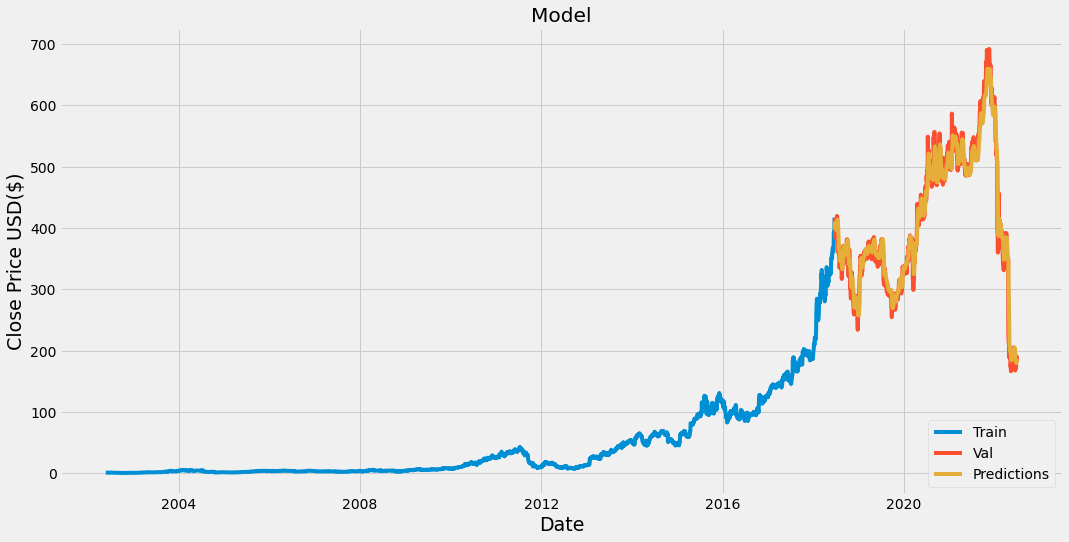

In [71]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Viz the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 19)
plt.ylabel('Close Price USD($)', fontsize = 19)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'],loc = 'lower right')
plt.show()

In [72]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-06-21,415.440002,397.232666
2018-06-22,411.089996,403.793121
2018-06-25,384.480011,408.458099
2018-06-26,399.390015,407.604553
2018-06-27,390.390015,406.341705
...,...,...
2022-06-22,178.889999,180.223801
2022-06-23,181.710007,179.843094
2022-06-24,190.850006,180.691605


In [73]:
# Get the quote
nflx_quote = web.DataReader('NFLX', data_source = 'yahoo', start = '2002-05-23',end = '2022-06-28')
#Create a new dataframe 
new_df = nflx_quote.filter(['Close'])
# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values 
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an Empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 14ms/step
[[188.0303]]


In [74]:
nflx_quote2 = web.DataReader('NFLX', data_source = 'yahoo', start = '2002-05-23',end = '2022-06-28')
print(nflx_quote2['Close'])

Date
2002-05-23      1.196429
2002-05-24      1.210000
2002-05-28      1.157143
2002-05-29      1.103571
2002-05-30      1.071429
                 ...    
2022-06-22    178.889999
2022-06-23    181.710007
2022-06-24    190.850006
2022-06-27    189.139999
2022-06-28    181.600006
Name: Close, Length: 5060, dtype: float64
